In [ ]:
import pretty_midi
import glob

midi_files = glob.glob("/home/cepatinog/smc-assignments/final_project/my_jazz_project/data/midi_files/WjazzD/**/*.mid", recursive=True)
all_pitches = []

for midi_path in midi_files:
    midi = pretty_midi.PrettyMIDI(midi_path)
    melody = midi.instruments[0]  # Asumimos que el solo está en la pista 0
    for note in melody.notes:
        all_pitches.append(note.pitch)

min_pitch = min(all_pitches)
max_pitch = max(all_pitches)
print(f"Pitch mínimo: {min_pitch}, Pitch máximo: {max_pitch}")
print(f"Pitch range real: {max_pitch - min_pitch + 1}")


Pitch mínimo: 36, Pitch máximo: 97
Pitch range real: 62


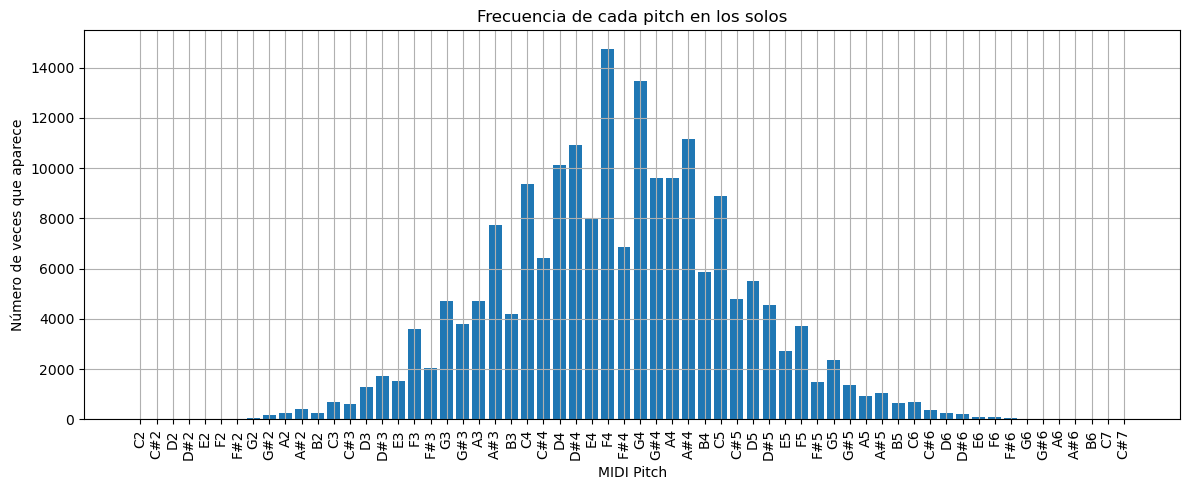

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

pitch_counter = Counter()

for midi_file in midi_files:
    midi = pretty_midi.PrettyMIDI(midi_file)
    melody = midi.instruments[0]  # Asumimos que la melodía está en la pista 0
    for note in melody.notes:
        pitch_counter[note.pitch] += 1

# Ordenar por pitch
sorted_pitches = sorted(pitch_counter.items())

# Extraer datos para plot
pitches, counts = zip(*sorted_pitches)

# Mostrar gráfico
plt.figure(figsize=(12, 5))
plt.bar(pitches, counts)
plt.title("Frecuencia de cada pitch en los solos")
plt.xlabel("MIDI Pitch")
plt.ylabel("Número de veces que aparece")
plt.grid(True)

# Opcional: etiquetas de nota
from pretty_midi import note_number_to_name
labels = [note_number_to_name(p) for p in pitches]
plt.xticks(pitches, labels, rotation=90)

plt.tight_layout()
plt.show()